<a href="https://colab.research.google.com/github/voshna123/tensorflow_practice/blob/main/Convolutional_NN_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading in data

In [1]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-01-06 07:33:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.3MB/s    in 5.7s    

2025-01-06 07:33:15 (18.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


## Getting class_names

In [3]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


## Visualising images

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img



Image shape: (512, 512, 3)


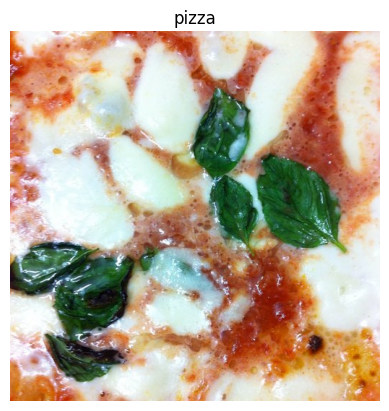

In [5]:
img = view_image(target_dir="pizza_steak/train/", target_class="pizza")

In [6]:
import tensorflow as tf

img = tf.constant(img)
img = img/255
img

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[0.8117647 , 0.40392157, 0.2509804 ],
        [0.827451  , 0.43137255, 0.25882354],
        [0.85490197, 0.47843137, 0.28235295],
        ...,
        [0.9254902 , 0.87058824, 0.8666667 ],
        [0.9254902 , 0.87058824, 0.8666667 ],
        [0.92156863, 0.8666667 , 0.8627451 ]],

       [[0.78431374, 0.36862746, 0.21176471],
        [0.80784315, 0.40392157, 0.22745098],
        [0.84705883, 0.46666667, 0.26666668],
        ...,
        [0.93333334, 0.8784314 , 0.8745098 ],
        [0.92941177, 0.8745098 , 0.87058824],
        [0.9254902 , 0.87058824, 0.8666667 ]],

       [[0.8117647 , 0.3882353 , 0.20784314],
        [0.84705883, 0.43137255, 0.24313726],
        [0.88235295, 0.4862745 , 0.27450982],
        ...,
        [0.9411765 , 0.8862745 , 0.88235295],
        [0.9372549 , 0.88235295, 0.8784314 ],
        [0.93333334, 0.8784314 , 0.8745098 ]],

       ...,

       [[0.79607844, 0.2627451 , 0.01960784],
        [0.79

## Preprocessing the data

In [7]:
tf.random.set_seed(42)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# setup paths to dir
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size =32,
                                               seed=42,
                                               class_mode = "binary")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size =32,
                                             seed = 42,
                                             class_mode = "binary")


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [8]:
len(train_data), len(test_data)

(47, 16)

## Building Tiny VGG model

* maxpool2d reduces overfitting

In [9]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters = 10,
                         kernel_size = 3,
                         activation ="relu",
                         input_shape =(224, 224, 3)),
  tf.keras.layers.Conv2D(filters = 10,
                         kernel_size = 3,
                         activation = 'relu'),
  tf.keras.layers.MaxPool2D(pool_size =(3,3),
                            strides =(1,1),
                            padding = 'valid'),
  tf.keras.layers.Conv2D(filters = 10,
                         kernel_size = 3,
                         activation = 'relu'),
  tf.keras.layers.Conv2D(filters = 10,
                         kernel_size = 3,
                         activation = 'relu'),
  tf.keras.layers.MaxPool2D(pool_size =2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics =['accuracy'])

hist1 = model1.fit(train_data,
                  epochs = 5,
                  validation_data = test_data)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 399ms/step - accuracy: 0.5420 - loss: 0.7486 - val_accuracy: 0.7780 - val_loss: 0.5003
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - accuracy: 0.7664 - loss: 0.4946 - val_accuracy: 0.8000 - val_loss: 0.4265
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.8029 - loss: 0.4334 - val_accuracy: 0.7580 - val_loss: 0.4959
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.8516 - loss: 0.3621 - val_accuracy: 0.7980 - val_loss: 0.4487
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - accuracy: 0.8950 - loss: 0.2841 - val_accuracy: 0.8320 - val_loss: 0.4064


## Testing non CNN on image data

In [11]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation ='relu'),
    tf.keras.layers.Dense(100, activation ='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

hist2 = model2.fit(train_data,
                   epochs = 5,
                   validation_data = test_data,)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step - accuracy: 0.5606 - loss: 8.8606 - val_accuracy: 0.6780 - val_loss: 1.0526
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - accuracy: 0.6900 - loss: 0.9112 - val_accuracy: 0.6980 - val_loss: 1.1817
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - accuracy: 0.6902 - loss: 1.2984 - val_accuracy: 0.7280 - val_loss: 0.7865
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - accuracy: 0.7134 - loss: 0.9333 - val_accuracy: 0.7620 - val_loss: 0.5792
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.7830 - loss: 0.5477 - val_accuracy: 0.5520 - val_loss: 1.3757


In [12]:
hist2.history, hist1.history

({'accuracy': [0.6420000195503235,
   0.6980000138282776,
   0.7113333344459534,
   0.7266666889190674,
   0.7746666669845581],
  'loss': [4.977290153503418,
   0.903985857963562,
   1.147128701210022,
   0.9134922027587891,
   0.5388238430023193],
  'val_accuracy': [0.6779999732971191,
   0.6980000138282776,
   0.7279999852180481,
   0.7620000243186951,
   0.5519999861717224],
  'val_loss': [1.0525943040847778,
   1.1816715002059937,
   0.7865368723869324,
   0.5791612863540649,
   1.3757494688034058]},
 {'accuracy': [0.6100000143051147,
   0.7553333044052124,
   0.8206666707992554,
   0.8473333120346069,
   0.8926666378974915],
  'loss': [0.6488493084907532,
   0.5146508812904358,
   0.4192625880241394,
   0.36816275119781494,
   0.27898404002189636],
  'val_accuracy': [0.777999997138977,
   0.800000011920929,
   0.7580000162124634,
   0.7979999780654907,
   0.8320000171661377],
  'val_loss': [0.500278651714325,
   0.4265211522579193,
   0.4958910644054413,
   0.44871678948402405,
  

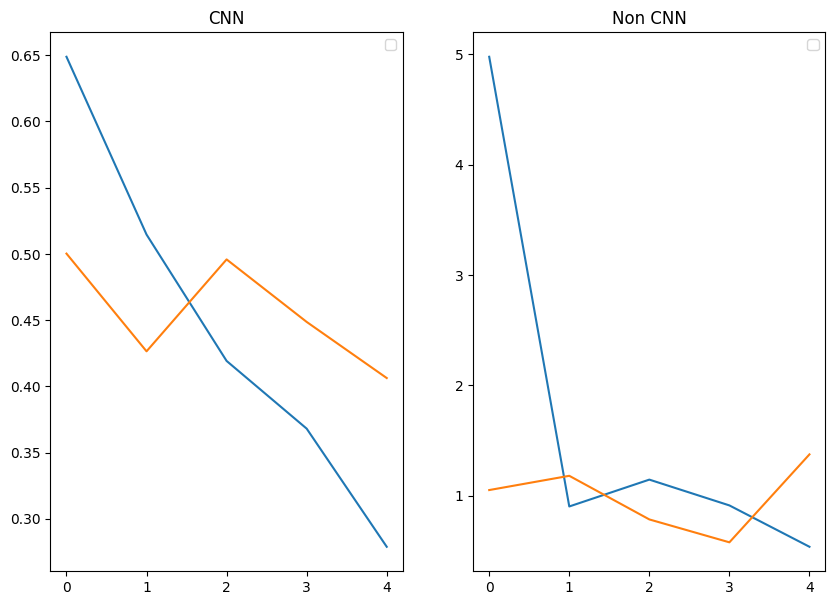

In [13]:
import pandas as pd
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.plot(pd.DataFrame(hist1.history)[['loss', 'val_loss']])
plt.title("CNN")
plt.legend()
plt.subplot(1,2,2)
plt.plot(pd.DataFrame(hist2.history)[['loss', 'val_loss']])
plt.title("Non CNN")
plt.legend()

## Reducing overfitting with data augmentation

In [35]:
train_data_augmented = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True
)


test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [45]:
train_data_2 = train_data_augmented.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size =32,
                                               seed=42,
                                               class_mode = "binary",
                                               shuffle = False)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size =32,
                                               seed=42,
                                               class_mode = "binary",
                                               shuffle = False)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size =32,
                                             seed = 42,
                                             class_mode = "binary",
                                             shuffle = False)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Visualising augemented images

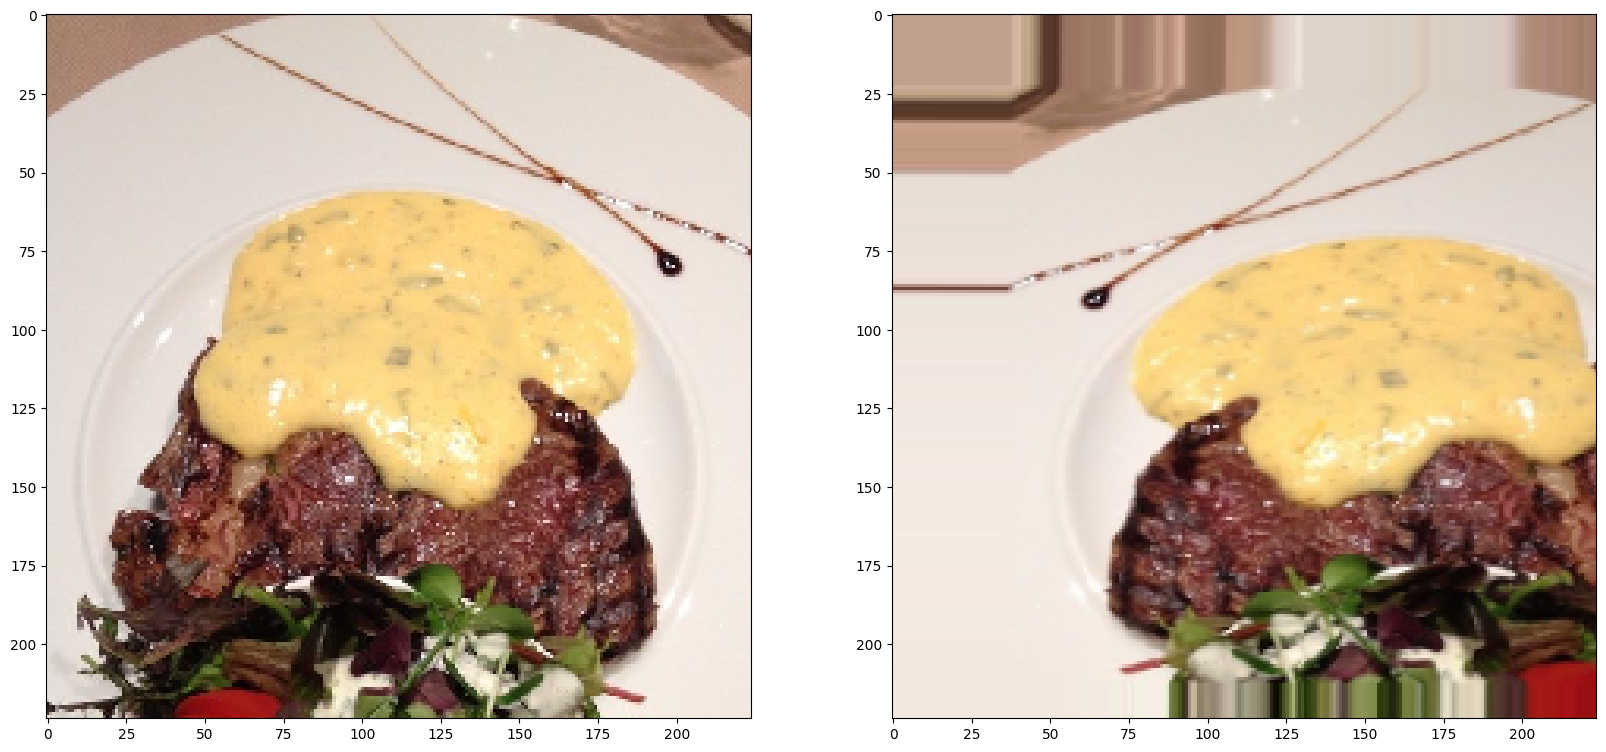

In [44]:
rand_batch = random.randint(0,len(train_data_2))
rand_img = random.randint(0,31)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(train_data[rand_batch][0][rand_img])
plt.subplot(1,2,2)
plt.imshow(train_data_2[rand_batch][0][rand_img])

## Training model on augmented data

In [49]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters= 10,
                           kernel_size = 3,
                           activation = 'relu'),
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 3),
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

hist3 = model2.fit(train_data_2,
                   epochs = 5,
                   validation_data = test_data)

Epoch 1/5
46/47 ━━━━━━━━━━━━━━━━━━━━ 0s 562ms/step - accuracy: 0.3938 - loss: 0.7468

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 669ms/step - accuracy: 0.3961 - loss: 0.7454 - val_accuracy: 0.5280 - val_loss: 0.6787
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 480ms/step - accuracy: 0.5114 - loss: 0.6897 - val_accuracy: 0.5660 - val_loss: 0.6707
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 492ms/step - accuracy: 0.5899 - loss: 0.6738 - val_accuracy: 0.7640 - val_loss: 0.6138
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 483ms/step - accuracy: 0.6654 - loss: 0.6298 - val_accuracy: 0.5060 - val_loss: 1.0228
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 30s 572ms/step - accuracy: 0.6913 - loss: 0.7101 - val_accuracy: 0.6600 - val_loss: 0.5880


In [54]:
pd.DataFrame(hist3.history)

,accuracy,loss,val_accuracy,val_loss
0,0.447333,0.712265,0.528,0.678710
1,0.515333,0.690831,0.566,0.670693
2,0.595333,0.674319,0.764,0.613814
3,0.679333,0.606341,0.506,1.022787
4,0.669333,0.678544,0.660,0.587964


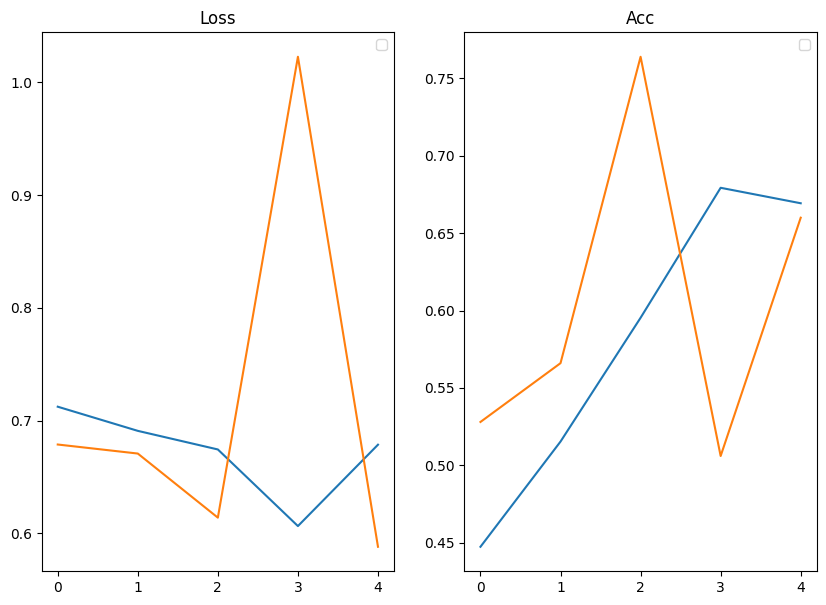

In [55]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.plot(pd.DataFrame(hist3.history)[['loss', 'val_loss']])
plt.title("Loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(pd.DataFrame(hist3.history)[['accuracy', 'val_accuracy']])
plt.title("Acc")
plt.legend()

## training but with shuffle turned on

In [56]:
tf.random.set_seed(42)
train_data_3 = train_data_augmented.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 32,
    seed= 42,
    class_mode ="binary",
    shuffle = True
)

Found 1500 images belonging to 2 classes.


In [58]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu'),
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 3),
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

hist4 = model3.fit(train_data_3,
                   epochs = 5,
                   validation_data = test_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 30s 508ms/step - accuracy: 0.5783 - loss: 0.6808 - val_accuracy: 0.7760 - val_loss: 0.4944
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 475ms/step - accuracy: 0.7539 - loss: 0.4955 - val_accuracy: 0.8260 - val_loss: 0.3665
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 452ms/step - accuracy: 0.7637 - loss: 0.4992 - val_accuracy: 0.8740 - val_loss: 0.3451
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 472ms/step - accuracy: 0.7628 - loss: 0.4904 - val_accuracy: 0.8220 - val_loss: 0.4017


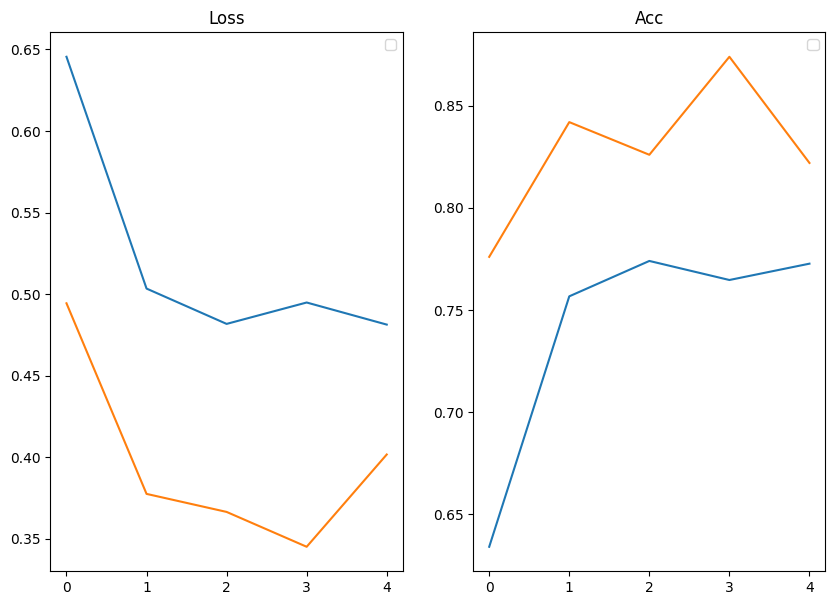

In [59]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.plot(pd.DataFrame(hist4.history)[['loss', 'val_loss']])
plt.title("Loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(pd.DataFrame(hist4.history)[['accuracy', 'val_accuracy']])
plt.title("Acc")
plt.legend()

## predicting on random img

--2025-01-06 08:11:50--  https://bbqchiefs.com/wp-content/uploads/2019/04/Ribeye-Steak-Garlic-Butter.jpg
Resolving bbqchiefs.com (bbqchiefs.com)... 192.0.78.213, 192.0.78.142
Connecting to bbqchiefs.com (bbqchiefs.com)|192.0.78.213|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1947328 (1.9M) [image/jpeg]
Saving to: ‘Ribeye-Steak-Garlic-Butter.jpg.1’

Ribeye-Steak-Garlic 100%[===================>]   1.86M  --.-KB/s    in 0.01s   

2025-01-06 08:11:50 (159 MB/s) - ‘Ribeye-Steak-Garlic-Butter.jpg.1’ saved [1947328/1947328]



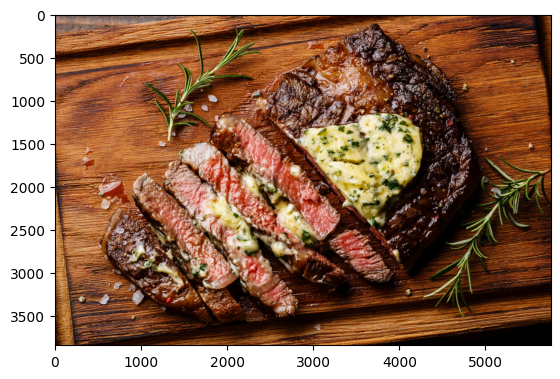

In [62]:
import matplotlib.image as mpimg

!wget https://bbqchiefs.com/wp-content/uploads/2019/04/Ribeye-Steak-Garlic-Butter.jpg

img = mpimg.imread("Ribeye-Steak-Garlic-Butter.jpg")
plt.imshow(img)

## making function to preprocessing images

In [66]:
def load_and_prep_img(file_name):
  """
  Reads an image and reshapes it
  """

  img = tf.io.read_file(file_name)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size = [224,224])
  img = img/255
  img = tf.expand_dims(img, axis = 0)
  return img


In [67]:
img = load_and_prep_img("Ribeye-Steak-Garlic-Butter.jpg")
img

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.47563025, 0.3579832 , 0.3187675 ],
         [0.43529412, 0.3254902 , 0.28235295],
         [0.3689676 , 0.30186072, 0.24577829],
         ...,
         [0.38129732, 0.16374737, 0.05922345],
         [0.5212885 , 0.29383755, 0.207043  ],
         [0.5634875 , 0.30858555, 0.15956593]],

        [[0.5123249 , 0.39859945, 0.3436975 ],
         [0.5220688 , 0.41534612, 0.37220886],
         [0.47619048, 0.41484594, 0.40356144],
         ...,
         [0.45070654, 0.21707861, 0.06694185],
         [0.61624646, 0.3473389 , 0.13417368],
         [0.5773109 , 0.35602242, 0.21708685]],

        [[0.6117647 , 0.49411765, 0.4627451 ],
         [0.6392157 , 0.50980395, 0.44313726],
         [0.52438974, 0.41290516, 0.36052424],
         ...,
         [0.4846439 , 0.2011106 , 0.03205097],
         [0.5641471 , 0.2806737 , 0.10876668],
         [0.50363916, 0.25770083, 0.11120225]],

        ...,

        [[0.08515433, 0.02633081, 

## Making prediction

In [70]:
pred = model3.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [89]:
pred = tf.round(pred)

## make function to assist in intepreting prediction class

In [90]:
def pred_interpret(class_names, pred):
  pred = tf.round(pred)
  return class_names[int(pred[0][0])]

In [91]:
pred = pred_interpret(class_names, pred)
pred

'steak'

## make function to plot img and then predict and interpret results

In [92]:
def plot_and_pred(model,file_name, class_names):
  img = load_and_prep_img(file_name)
  pred = model.predict(img)
  pred = pred_interpret(class_names,pred)
  plt.imshow(tf.squeeze(img))
  plt.title(f"Prediction: {pred}")
  plt.axis("off")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


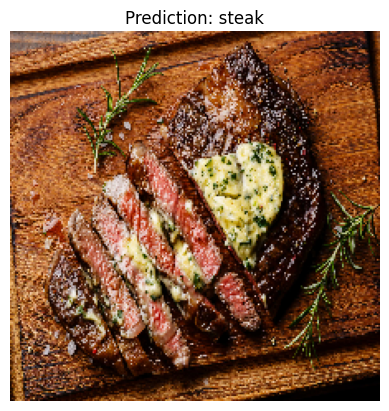

In [93]:
plot_and_pred(model3, "Ribeye-Steak-Garlic-Butter.jpg", class_names)